In [ ]:
import matplotlib.pyplot as plt
import numpy as np

methods = [f'Metric_{ix}' for ix in range(7)]
results = [
    # one row per method
    [0.4, 0.2, 0.8, 0.6, 0.7, 0.8, 0.5],
    [0.3, 0.5, 0.4, 0.7, 0.9, 0.6, 0.4],
    [0.5, 0.4, 0.6, 0.8, 0.4, 0.6, 0.3]
]

# Close the loop
methods = [*methods, methods[0]]
for ix in range(len(results)):
    results[ix] = [*results[ix], results[ix][0]]

# label_loc = np.arange(start=np.pi/2, stop=np.pi/2)
    
    plt.figure()
fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi , num=len(methods)) # + np.pi/2

# Radar lines
linestyles=["solid", "--", "--"]
markers=["o", "o", "s"]
for res_ix, res in enumerate(results):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix%len(results)], marker=markers[res_ix], markersize=6)

# Metric_0 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Four Concentric circles
thickness=0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=methods, verticalalignment='top')
ax.tick_params(pad=20)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table
methods = ['WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA', 'WebQS', 'VQAv2']
results = [
    [0.645, 0.468, 0.279, 0.522, 0.347, 0, 0.147], # P-Tuning
    [0.524, 0.298, 0.214, 0.506, 0.002, 0, 0.125], # Prefix Tuning
    [0.685, 0.504, 0.272, 0.536, 0.395, 0, 0.127], # QLoRA
    [0.692, 0.507, 0.282, 0.554, 0.399, 0, 0.134]  # LoRA
]

# Close the loop
methods = [*methods, methods[0]]
for ix in range(len(results)):
    results[ix] = [*results[ix], results[ix][0]]

plt.figure()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "--", ":"]
markers = ["o", "o", "s", "^"]
for res_ix, res in enumerate(results):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=f'Method {res_ix+1}')

# Metric_0 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=methods, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table
methods = ['WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA', 'WebQS', 'VQAv2']
results = [
    [0.645, 0.468, 0.279, 0.522, 0.347, 0, 0.147],  # P-Tuning
    [0.524, 0.298, 0.214, 0.506, 0.002, 0, 0.125],  # Prefix Tuning
    [0.685, 0.504, 0.272, 0.536, 0.395, 0, 0.127],  # QLoRA
    [0.692, 0.507, 0.282, 0.554, 0.399, 0, 0.134]   # LoRA
]

# Normalizing the data
max_value = max(max(result) for result in results)
min_value = min(min(result) for result in results)

results_normalized = [(np.array(result) - min_value) / (max_value - min_value) for result in results]

# Close the loop for the radar chart
methods = [*methods, methods[0]]
for ix in range(len(results_normalized)):
    results_normalized[ix] = [*results_normalized[ix], results_normalized[ix][0]]

plt.figure()
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "o", "s", "^"]
labels = ['P-Tuning', 'Prefix Tuning', 'QLoRA', 'LoRA']
for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=labels[res_ix])

# Metric_0 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=methods, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed
methods = ['WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA', 'VQAv2']
results = [
    [0.645, 0.468, 0.279, 0.522, 0.347, 0.147],  # P-Tuning
    [0.524, 0.298, 0.214, 0.506, 0.002, 0.125],  # Prefix Tuning
    [0.685, 0.504, 0.272, 0.536, 0.395, 0.127],  # QLoRA
    [0.692, 0.507, 0.282, 0.554, 0.399, 0.134]   # LoRA
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "o", "s", "^"]
labels = ['P-Tuning', 'Prefix Tuning', 'QLoRA', 'LoRA']
for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=labels[res_ix])

# Metric_0 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=methods, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.125, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.127, 0.685, 0.504, 0.272, 0.536, 0.395],  # QLoRA
    [0.134, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "o", "s", "^"]
model_labels = ['P-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM']  # LoRA renamed to SGM
for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.125, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.127, 0.685, 0.504, 0.272, 0.536, 0.395],  # QLoRA
    [0.134, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-."]
markers = ["o", "s", "^"]
model_labels = ['Prefix Tuning', 'QLoRA', 'SGM']  # LoRA renamed to SGM
for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors)))
ax.set_yticklabels([])
for ix in range(len(colors), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.125, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.127, 0.685, 0.504, 0.272, 0.536, 0.395],  # QLoRA
    [0.134, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-."]
markers = ["o", "s", "^"]
model_labels = ['Prefix Tuning', 'QLoRA', 'SGM']  # LoRA renamed to SGM
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Different color for Prefix Tuning

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.125, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.127, 0.685, 0.504, 0.272, 0.536, 0.395],  # QLoRA
    [0.134, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-."]
markers = ["o", "s", "^"]
model_labels = ['Prefix Tuning', 'QLoRA', 'SGM']  # LoRA renamed to SGM
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Different color for Prefix Tuning

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and reordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.125, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.127, 0.685, 0.504, 0.272, 0.536, 0.395],  # QLoRA
    [0.134, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-."]
markers = ["o", "s", "^"]
model_labels = ['Prefix Tuning', 'QLoRA', 'SGM']  # LoRA renamed to SGM
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]  # Different color for Prefix Tuning

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],  # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "s", "^", "d"]
model_labels = ['Naive Fine-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM*']  # LoRA renamed to SGM
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # Different color for each method

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=2, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=6, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
#plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Save the plot as SVG
plt.savefig('radar_chart.svg')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],  # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "s", "^", "d"]
model_labels = ['Naive Fine-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM*']  # LoRA renamed to SGM
colors = ["#ff0000", "#00ff00", "#0000ff", "#ff00ff"]  # Brighter colors for each method

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=3, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=8, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Save the plot as SVG
plt.savefig('radar_chart.svg')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],  # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "--", "-.", ":"]
markers = ["o", "s", "^", "d"]
model_labels = ['Naive Fine-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM*']  # LoRA renamed to SGM
colors = ["#ff0000", "#00ff00", "#0000ff", "#ff00ff"]  # Brighter colors for each method

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=3, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=8, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#83C9AD", "#A8CACE", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

# Increase font size
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

# Apply the larger font size to the labels
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=16, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Save the plot as SVG
plt.savefig('radar_chart.svg', format='svg')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],  # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],  # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "solid", "solid", "solid"]
markers = ["o", "s", "^", "d"]
model_labels = ['Naive Fine-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM*']  # LoRA renamed to SGM
colors = ["#FFD700", "#32CD32", "#FFA500", "#FF4500"]  # Bright yellow, green, orange, and red

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=4, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=10, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.25
colors_circles = ["#D1EDD2", "#A8CACE", "#83C9AD", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

# Increase font size
plt.rc('font', size=18)          # controls default text sizes
plt.rc('axes', titlesize=20)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fontsize of the figure title

# Apply the larger font size to the labels
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=16, verticalalignment='top')
ax.tick_params(pad=20)

# Adding legend
plt.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

# Save the plot as SVG
plt.savefig('radar_chart.svg', format='svg')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],    # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],      # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently to range [0, 1]
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "solid", "solid", "solid"]
markers = ["o", "s", "^", "d"]
model_labels = ['Naive Fine-Tuning', 'Prefix Tuning', 'QLoRA', 'SGM*']  # LoRA renamed to SGM
colors = ["#FFD700", "#32CD32", "#FFA500", "#FF4500"]  # Bright yellow, green, orange, and red

for res_ix, res in enumerate(results_normalized):
    ax.plot(label_loc, res, lw=4, ls=linestyles[res_ix % len(results)], marker=markers[res_ix], markersize=10, label=model_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.3
colors_circles = ["#D1EDD2", "#A8CACE", "#83C9AD", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

# Increase font size for readability and spacing of labels
plt.rc('font', family='serif', size=18)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=26)   # fontsize of the figure title

# Apply the larger font size to the labels and space them out
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=20, verticalalignment='top')
ax.tick_params(pad=40)  # Increase padding to space the labels further from the chart

# Adding legend at the top, horizontal, and spaced out
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4, frameon=False, handletextpad=1.5, columnspacing=2)

# Save the plot as SVG
plt.savefig('radar_chart.svg', format='svg')

plt.show()


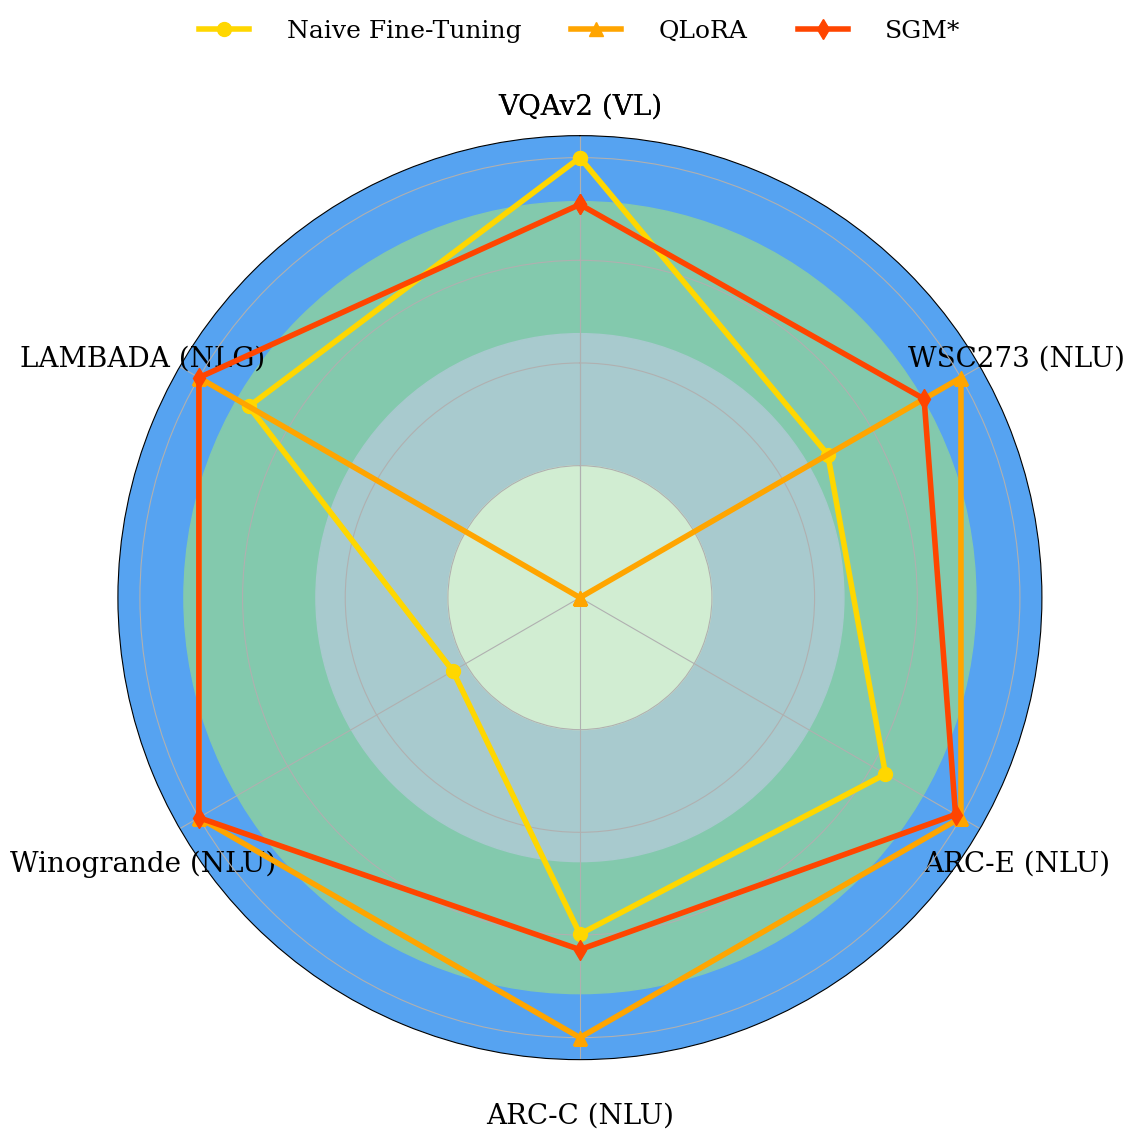

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],    # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],      # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently to range [0, 1]
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Exclude Prefix Tuning from plotting
plot_results = results_normalized[[0, 2, 3]]  # Exclude the second row (Prefix Tuning)
plot_labels = ['Naive Fine-Tuning', 'QLoRA', 'SGM*']  # Adjusted model labels

# Custom labels
labels = ['VQAv2 (VL)', 'WSC273 (NLU)', 'ARC-E (NLU)', 'ARC-C (NLU)', 'Winogrande (NLU)', 'LAMBADA (NLG)', 'VQAv2 (VL)']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "solid", "solid"]
markers = ["o", "^", "d"]
colors = ["#FFD700", "#FFA500", "#FF4500"]  # Bright yellow, orange, and red

for res_ix, res in enumerate(plot_results):
    ax.plot(label_loc, res, lw=4, ls=linestyles[res_ix], marker=markers[res_ix], markersize=10, label=plot_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.3
colors_circles = ["#D1EDD2", "#A8CACE", "#83C9AD", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

# Increase font size for readability and spacing of labels
plt.rc('font', family='serif', size=18)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=26)   # fontsize of the figure title

# Apply the larger font size to the labels and space them out
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=20, verticalalignment='top')
ax.tick_params(pad=20)  # Increase padding to space the labels further from the chart

# Adding legend at the top, horizontal, and spaced out
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, handletextpad=1.5, columnspacing=2)

# Save the plot as SVG
plt.savefig('radar_chart.svg', format='svg')

plt.show()


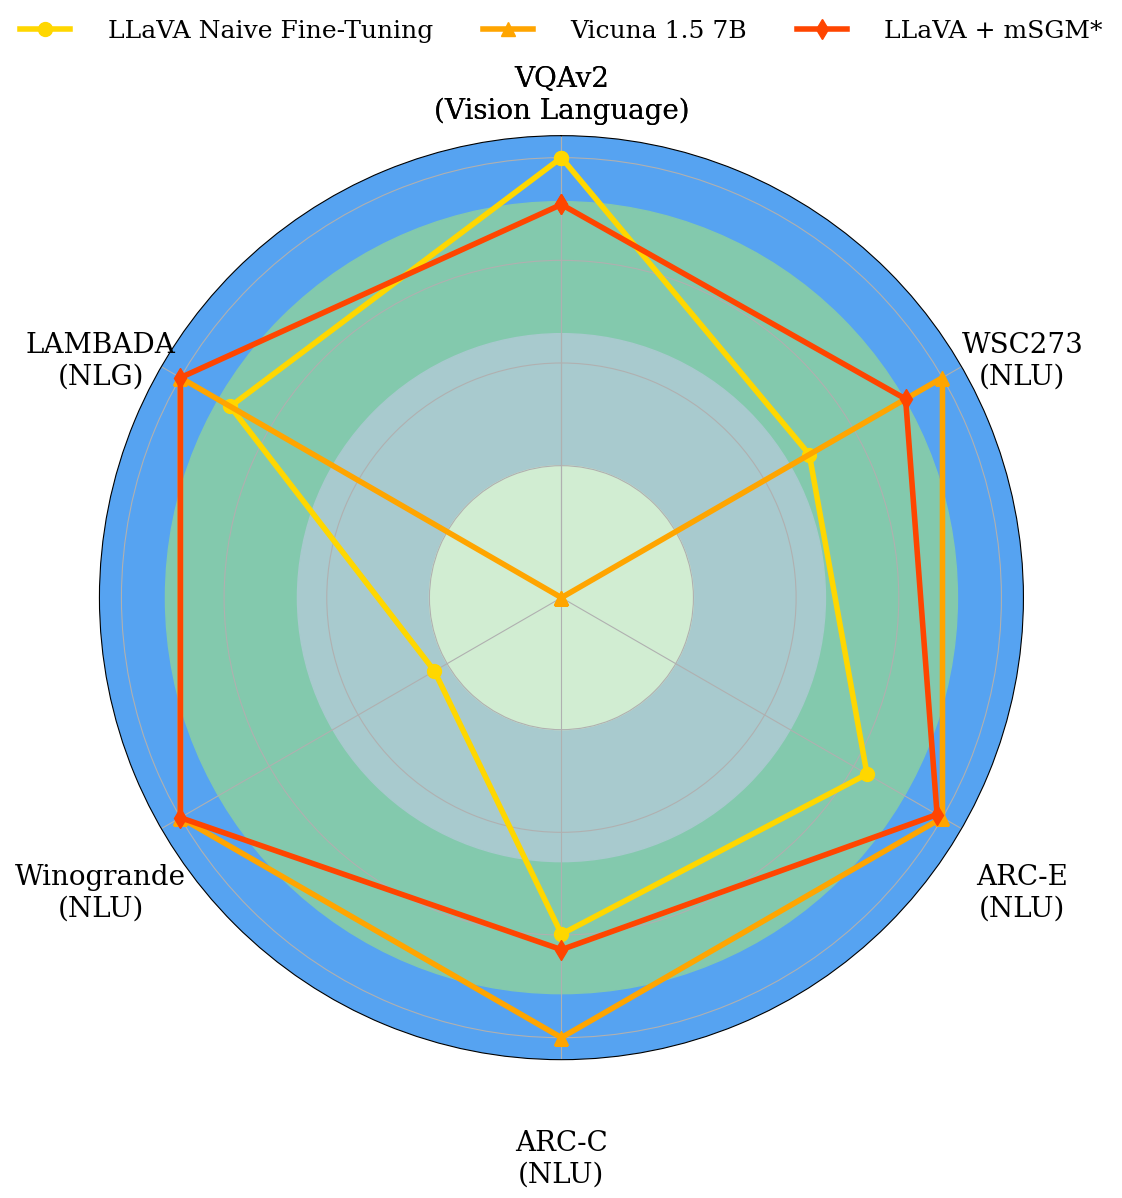

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Data extracted from the table, with WebQS removed and re-ordered
methods = ['VQAv2', 'WSC273', 'ARC-E', 'ARC-C', 'Winogrande', 'LAMBADA']
results = [
    [0.147, 0.645, 0.468, 0.279, 0.522, 0.347],  # P-Tuning
    [0.1, 0.524, 0.298, 0.214, 0.506, 0.002],    # Prefix Tuning
    [0.1, 0.71, 0.51, 0.299, 0.554, 0.399],      # QLoRA
    [0.142, 0.692, 0.507, 0.282, 0.554, 0.399]   # LoRA (renamed to SGM)
]

# Normalizing the data for each task independently to range [0, 1]
results = np.array(results)
results_normalized = np.zeros_like(results)

for i in range(results.shape[1]):
    col_min = np.min(results[:, i])
    col_max = np.max(results[:, i])
    if col_max - col_min != 0:  # avoid division by zero
        results_normalized[:, i] = (results[:, i] - col_min) / (col_max - col_min)

# Close the loop for the radar chart
methods.append(methods[0])
results_normalized = np.concatenate((results_normalized, results_normalized[:, [0]]), axis=1)

# Exclude Prefix Tuning from plotting
plot_results = results_normalized[[0, 2, 3]]  # Exclude the second row (Prefix Tuning)
plot_labels = ['LLaVA Naive Fine-Tuning', 'Vicuna 1.5 7B', 'LLaVA + mSGM*']  # Adjusted model labels

# Custom labels with line breaks
labels = ['VQAv2\n(Vision Language)', 'WSC273\n(NLU)', 'ARC-E\n(NLU)', 'ARC-C\n(NLU)', 'Winogrande\n(NLU)', 'LAMBADA\n(NLG)', 'VQAv2\n(Vision Language)']

fig, ax = plt.subplots(figsize=(12, 12), subplot_kw=dict(polar=True))
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(methods))

# Radar lines
linestyles = ["solid", "solid", "solid"]
markers = ["o", "^", "d"]
colors = ["#FFD700", "#FFA500", "#FF4500"]  # Bright yellow, orange, and red

for res_ix, res in enumerate(plot_results):
    ax.plot(label_loc, res, lw=4, ls=linestyles[res_ix], marker=markers[res_ix], markersize=10, label=plot_labels[res_ix], color=colors[res_ix])

# VQAv2 at the top, remaining metrics are added in a clockwise direction
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)

# Concentric circles
thickness = 0.3
colors_circles = ["#D1EDD2", "#A8CACE", "#83C9AD", "#56A3F1"]
ax.set_rticks(np.linspace(thickness, 1.0, len(colors_circles)))
ax.set_yticklabels([])
for ix in range(len(colors_circles), 0, -1):
    circ = plt.Circle((0, 0), ix * thickness, transform=ax.transData._b, color=colors_circles[ix - 1])
    ax.add_artist(circ)

# Increase font size for readability and spacing of labels
plt.rc('font', family='serif', size=18)          # controls default text sizes
plt.rc('axes', titlesize=24)     # fontsize of the axes title
plt.rc('axes', labelsize=20)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=18)    # legend fontsize
plt.rc('figure', titlesize=26)   # fontsize of the figure title

# Apply the larger font size to the labels and space them out
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=labels, fontsize=20, verticalalignment='top')
ax.tick_params(pad=40)  # Increase padding to space the labels further from the chart

# Adding legend at the top, horizontal, and spaced out
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, frameon=False, handletextpad=1.5, columnspacing=2)

# Save the plot as SVG
plt.savefig('radar_chart.svg', format='svg')

plt.show()
